In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

data = pd.read_csv('C:\\Users\\Karyna\\Desktop\\AI_python\\AI_projekt\\dataset_FlatRent\\data_clean.csv', sep = ',')
data
# Просмотр общей информации
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 85 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   area                                                    3472 non-null   float64
 1   room_num                                                3472 non-null   float64
 2   floor                                                   3472 non-null   float64
 3   total_floor                                             3472 non-null   float64
 4   year_built                                              3472 non-null   float64
 5   poddasze                                                3472 non-null   float64
 6   dish_washer(zmywarka)                                   3472 non-null   float64
 7   fridge(lodówka)                                         3472 non-null   float64
 8   furniture(meble)                      

Пропуски в данных:
 area                     0
room_num                 0
floor                    0
total_floor              0
year_built               0
                        ..
district_ Włochy         0
district_ mazowieckie    0
district_ Śródmieście    0
district_ Żoliborz       0
gross_price              0
Length: 85, dtype: int64


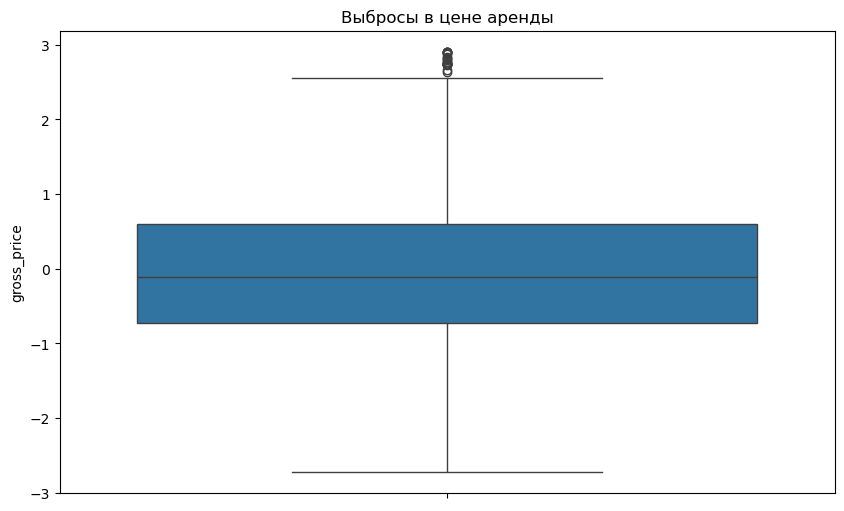

Размер данных после удаления выбросов: (3222, 85)
Количество выбросов в 'area': 41
Количество выбросов в 'gross_price': 24


In [22]:
# Шаг 2: Проверка выбросов
# Пример для переменных area и gross_price
# Удаление/замена пропусков (если есть)
print("Пропуски в данных:\n", data.isnull().sum())
data = data.dropna()

# Проверка выбросов (например, на площадь или цену)
plt.figure(figsize=(10, 6))
sns.boxplot(data['gross_price'])
plt.title("Выбросы в цене аренды")
plt.show()

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers_area = detect_outliers(data, "area")
outliers_price = detect_outliers(data, "gross_price")


print("Размер данных после удаления выбросов:", data.shape)

print(f"Количество выбросов в 'area': {len(outliers_area)}")
print(f"Количество выбросов в 'gross_price': {len(outliers_price)}")



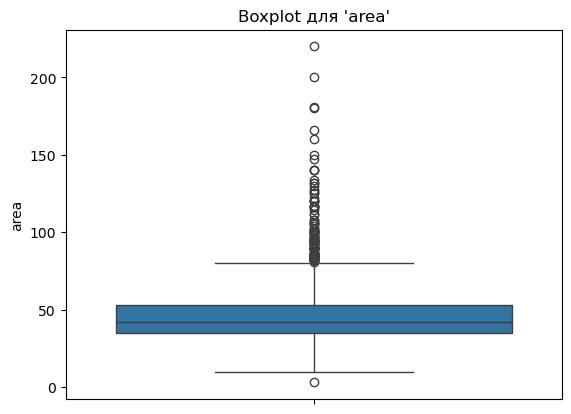

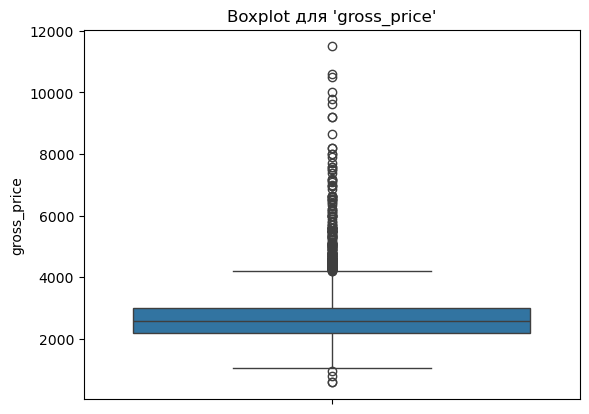

In [14]:
# Визуализация выбросов

sns.boxplot(data['area'])
plt.title("Boxplot для 'area'")
plt.show()

sns.boxplot(data['gross_price'])
plt.title("Boxplot для 'gross_price'")
plt.show()

In [25]:
# Шаг 3: Удаление выбросов
# Убираем строки с выбросами
area_lower, area_upper = data['area'].quantile([0.25, 0.75])
price_lower, price_upper = data['gross_price'].quantile([0.25, 0.75])
IQR_area = area_upper - area_lower
IQR_price = price_upper - price_lower

data = data[(data['area'] >= area_lower - 1.5 * IQR_area) & (data['area'] <= area_upper + 1.5 * IQR_area)]
data = data[(data['gross_price'] >= price_lower - 1.5 * IQR_price) & (data['gross_price'] <= price_upper + 1.5 * IQR_price)]

print("Размер данных после удаления выбросов:", data.shape)

Размер данных после удаления выбросов: (3120, 85)


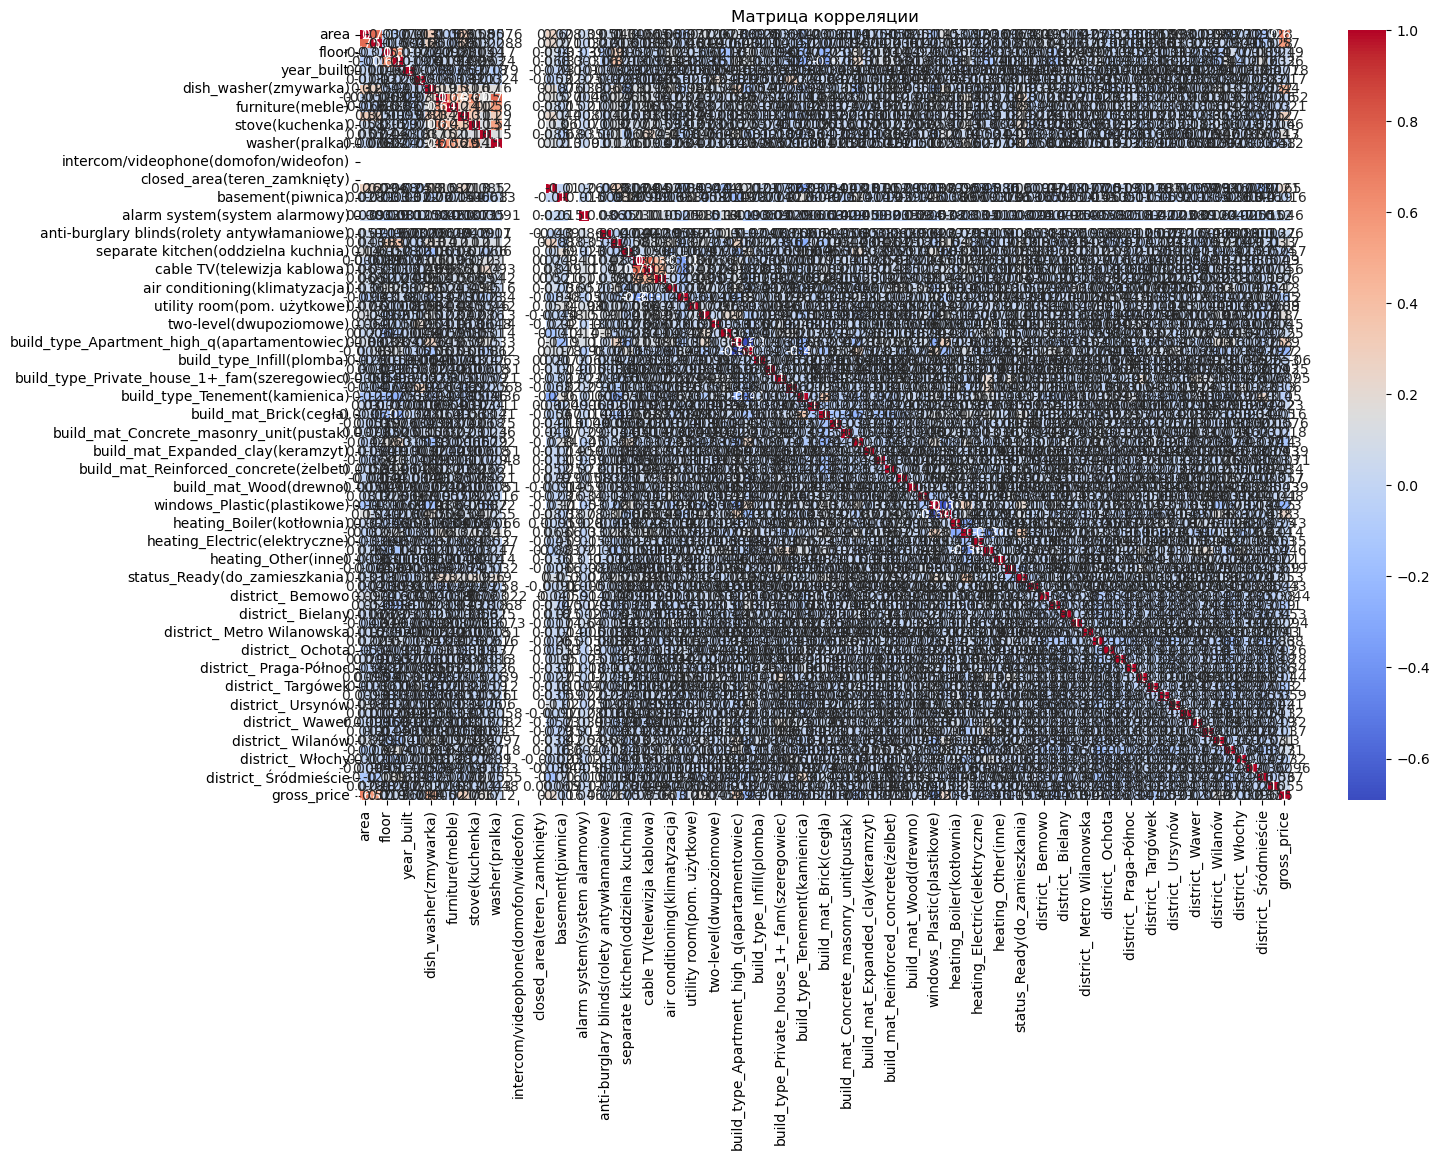

In [16]:
# Шаг 4: Анализ значимости признаков
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Матрица корреляции")
plt.show()

In [17]:
# Шаг 5: Масштабирование (если требуется для дальнейших моделей)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['area', 'gross_price', 'room_num']  # Укажи нужные числовые признаки
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print("Масштабирование завершено")


Масштабирование завершено
